# member_check_ins (MCI): Raw Data Discovery & Insights

### Target Attributes: member_id, check_in_date, check_in_time.

In [ ]:
import sqlite3
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

conn = sqlite3.connect(r"__PATH__")

df = pd.read_sql_query("SELECT * FROM member_check_ins", conn)

### Data Understanding, Cleaning & Preparation

In [2]:
df.shape

(89066, 13)

In [3]:
df.head(2)

,checkin_row_id,member_id,Station,First Name,Last Name,Check-In Date,Check-In Time,Check-In Method,Check-In Status,Check-In Notes,Member Status,Member Alerts,Member Account Status
0,1,ABC1609,Side Entrance,Brenda,Stephens,2025-01-01,09:04 PM,Key Card,Successful,No issues,Good Standing,None,Active
1,2,ABC1484,Side Entrance,Mary,Nelson,2024-03-22,06:47 PM,Key Card,Successful,No issues,Good Standing,None,Active


In [4]:
df.columns, df.dtypes

(Index(['checkin_row_id', 'member_id', 'Station', 'First Name', 'Last Name',
        'Check-In Date', 'Check-In Time', 'Check-In Method', 'Check-In Status',
        'Check-In Notes', 'Member Status', 'Member Alerts',
        'Member Account Status'],
       dtype='object'),
 checkin_row_id            int64
 member_id                object
 Station                  object
 First Name               object
 Last Name                object
 Check-In Date            object
 Check-In Time            object
 Check-In Method          object
 Check-In Status          object
 Check-In Notes           object
 Member Status            object
 Member Alerts            object
 Member Account Status    object
 dtype: object)

In [5]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")

In [6]:
df.columns

Index(['checkin_row_id', 'member_id', 'station', 'first_name', 'last_name',
       'check_in_date', 'check_in_time', 'check_in_method', 'check_in_status',
       'check_in_notes', 'member_status', 'member_alerts',
       'member_account_status'],
      dtype='object')

In [7]:
df = df[[
    #'checkin_row_id', 
    'member_id', 
    #'Station', 'First_Name', 'Last_Name',
       'check_in_date', 'check_in_time', 
     #  'Check_In_Method', 'Check_In_Status',
     #  'Check_In_Notes', 'Member_Status', 'Member_Alerts',
     #  'Member_Account_Status'
       ]].copy()

In [8]:
df['check_in_date'] = pd.to_datetime(df['check_in_date'], errors='coerce')

In [9]:
df['check_in_time'] = pd.to_datetime(df['check_in_time'], format="%I:%M %p").dt.time

In [10]:
df.columns, df.dtypes

(Index(['member_id', 'check_in_date', 'check_in_time'], dtype='object'),
 member_id                object
 check_in_date    datetime64[ns]
 check_in_time            object
 dtype: object)

In [11]:
df.isna().sum()

member_id        0
check_in_date    0
check_in_time    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(4589)

In [13]:
df[df['member_id'] == "ABC1010"]

,member_id,check_in_date,check_in_time
1591,ABC1010,2024-07-21,07:29:00
2218,ABC1010,2025-01-25,22:29:00
2517,ABC1010,2024-10-02,21:14:00
4459,ABC1010,2024-07-19,18:21:00
5356,ABC1010,2025-06-18,07:11:00
...,...,...,...
80965,ABC1010,2024-06-30,07:19:00
84466,ABC1010,2025-01-12,05:17:00
87038,ABC1010,2025-04-02,06:42:00
88234,ABC1010,2025-03-12,09:26:00


### Member-Level Aggregates

In [14]:
# 1. Total check-ins per member
df['total_checkins'] = df.groupby("member_id")["check_in_date"].transform("count")

df[df['member_id'] == "ABC1010"]

,member_id,check_in_date,check_in_time,total_checkins
1591,ABC1010,2024-07-21,07:29:00,68
2218,ABC1010,2025-01-25,22:29:00,68
2517,ABC1010,2024-10-02,21:14:00,68
4459,ABC1010,2024-07-19,18:21:00,68
5356,ABC1010,2025-06-18,07:11:00,68
...,...,...,...,...
80965,ABC1010,2024-06-30,07:19:00,68
84466,ABC1010,2025-01-12,05:17:00,68
87038,ABC1010,2025-04-02,06:42:00,68
88234,ABC1010,2025-03-12,09:26:00,68


In [15]:
# 2. Active months per member (distinct months with activity)
df['active_months'] = (
    df.groupby('member_id')['check_in_date']
      .transform(lambda x: x.dt.to_period('M').nunique())
)

df[df['member_id'] == "ABC1010"]

,member_id,check_in_date,check_in_time,total_checkins,active_months
1591,ABC1010,2024-07-21,07:29:00,68,16
2218,ABC1010,2025-01-25,22:29:00,68,16
2517,ABC1010,2024-10-02,21:14:00,68,16
4459,ABC1010,2024-07-19,18:21:00,68,16
5356,ABC1010,2025-06-18,07:11:00,68,16
...,...,...,...,...,...
80965,ABC1010,2024-06-30,07:19:00,68,16
84466,ABC1010,2025-01-12,05:17:00,68,16
87038,ABC1010,2025-04-02,06:42:00,68,16
88234,ABC1010,2025-03-12,09:26:00,68,16


In [16]:
# 3. Average check-ins per active month
df['avg_checkins_per_month'] = df['total_checkins'] / df['active_months']

df[df['member_id'] == "ABC1010"]

,member_id,check_in_date,check_in_time,total_checkins,active_months,avg_checkins_per_month
1591,ABC1010,2024-07-21,07:29:00,68,16,4.25
2218,ABC1010,2025-01-25,22:29:00,68,16,4.25
2517,ABC1010,2024-10-02,21:14:00,68,16,4.25
4459,ABC1010,2024-07-19,18:21:00,68,16,4.25
5356,ABC1010,2025-06-18,07:11:00,68,16,4.25
...,...,...,...,...,...,...
80965,ABC1010,2024-06-30,07:19:00,68,16,4.25
84466,ABC1010,2025-01-12,05:17:00,68,16,4.25
87038,ABC1010,2025-04-02,06:42:00,68,16,4.25
88234,ABC1010,2025-03-12,09:26:00,68,16,4.25


In [17]:
# extract day of week
df['day_of_week'] = df['check_in_date'].dt.day_name()

# 4. Most frequent day of week
most_freq_dow = (
    df.groupby(['member_id','day_of_week']).size()
      .reset_index(name='count')
      .sort_values(['member_id','count'], ascending=[True,False])
      .drop_duplicates('member_id')[['member_id','day_of_week']]
      .rename(columns={'day_of_week':'most_frequent_day'})
)

df = df.merge(most_freq_dow, on='member_id', how='left')

df[df['member_id'] == "ABC1010"]

,member_id,check_in_date,check_in_time,total_checkins,active_months,avg_checkins_per_month,day_of_week,most_frequent_day
1591,ABC1010,2024-07-21,07:29:00,68,16,4.25,Sunday,Wednesday
2218,ABC1010,2025-01-25,22:29:00,68,16,4.25,Saturday,Wednesday
2517,ABC1010,2024-10-02,21:14:00,68,16,4.25,Wednesday,Wednesday
4459,ABC1010,2024-07-19,18:21:00,68,16,4.25,Friday,Wednesday
5356,ABC1010,2025-06-18,07:11:00,68,16,4.25,Wednesday,Wednesday
...,...,...,...,...,...,...,...,...
80965,ABC1010,2024-06-30,07:19:00,68,16,4.25,Sunday,Wednesday
84466,ABC1010,2025-01-12,05:17:00,68,16,4.25,Sunday,Wednesday
87038,ABC1010,2025-04-02,06:42:00,68,16,4.25,Wednesday,Wednesday
88234,ABC1010,2025-03-12,09:26:00,68,16,4.25,Wednesday,Wednesday


In [18]:
# Extract hour
df['hour'] = df['check_in_time'].apply(lambda t: t.hour)

# 4. Most common hour
most_freq_hour = (
    df.groupby(['member_id','hour']).size()
      .reset_index(name='count')
      .sort_values(['member_id','count'], ascending=[True,False])
      .drop_duplicates('member_id')[['member_id','hour']]
      .rename(columns={'hour':'most_common_hour'})
)

df = df.merge(most_freq_hour, on='member_id', how='left')


df[df['member_id'] == "ABC1010"]

,member_id,check_in_date,check_in_time,total_checkins,active_months,avg_checkins_per_month,day_of_week,most_frequent_day,hour,most_common_hour
1591,ABC1010,2024-07-21,07:29:00,68,16,4.25,Sunday,Wednesday,7,7
2218,ABC1010,2025-01-25,22:29:00,68,16,4.25,Saturday,Wednesday,22,7
2517,ABC1010,2024-10-02,21:14:00,68,16,4.25,Wednesday,Wednesday,21,7
4459,ABC1010,2024-07-19,18:21:00,68,16,4.25,Friday,Wednesday,18,7
5356,ABC1010,2025-06-18,07:11:00,68,16,4.25,Wednesday,Wednesday,7,7
...,...,...,...,...,...,...,...,...,...,...
80965,ABC1010,2024-06-30,07:19:00,68,16,4.25,Sunday,Wednesday,7,7
84466,ABC1010,2025-01-12,05:17:00,68,16,4.25,Sunday,Wednesday,5,7
87038,ABC1010,2025-04-02,06:42:00,68,16,4.25,Wednesday,Wednesday,6,7
88234,ABC1010,2025-03-12,09:26:00,68,16,4.25,Wednesday,Wednesday,9,7


In [19]:
# 5. Last check-in date
last_checkin = (
    df.groupby('member_id')['check_in_date']
      .max().reset_index(name='last_checkin_date')
)

df = df.merge(last_checkin, on='member_id', how='left')
df[df['member_id'] == "ABC1010"]

,member_id,check_in_date,check_in_time,total_checkins,active_months,avg_checkins_per_month,day_of_week,most_frequent_day,hour,most_common_hour,last_checkin_date
1591,ABC1010,2024-07-21,07:29:00,68,16,4.25,Sunday,Wednesday,7,7,2025-08-23
2218,ABC1010,2025-01-25,22:29:00,68,16,4.25,Saturday,Wednesday,22,7,2025-08-23
2517,ABC1010,2024-10-02,21:14:00,68,16,4.25,Wednesday,Wednesday,21,7,2025-08-23
4459,ABC1010,2024-07-19,18:21:00,68,16,4.25,Friday,Wednesday,18,7,2025-08-23
5356,ABC1010,2025-06-18,07:11:00,68,16,4.25,Wednesday,Wednesday,7,7,2025-08-23
...,...,...,...,...,...,...,...,...,...,...,...
80965,ABC1010,2024-06-30,07:19:00,68,16,4.25,Sunday,Wednesday,7,7,2025-08-23
84466,ABC1010,2025-01-12,05:17:00,68,16,4.25,Sunday,Wednesday,5,7,2025-08-23
87038,ABC1010,2025-04-02,06:42:00,68,16,4.25,Wednesday,Wednesday,6,7,2025-08-23
88234,ABC1010,2025-03-12,09:26:00,68,16,4.25,Wednesday,Wednesday,9,7,2025-08-23


In [20]:
# Today's Date
today = pd.to_datetime("today")

# 6. Days since last check-in
df['days_since_last_checkin'] = (today - df['last_checkin_date']).dt.days

df[df['member_id'] == "ABC1010"]


,member_id,check_in_date,check_in_time,total_checkins,active_months,avg_checkins_per_month,day_of_week,most_frequent_day,hour,most_common_hour,last_checkin_date,days_since_last_checkin
1591,ABC1010,2024-07-21,07:29:00,68,16,4.25,Sunday,Wednesday,7,7,2025-08-23,11
2218,ABC1010,2025-01-25,22:29:00,68,16,4.25,Saturday,Wednesday,22,7,2025-08-23,11
2517,ABC1010,2024-10-02,21:14:00,68,16,4.25,Wednesday,Wednesday,21,7,2025-08-23,11
4459,ABC1010,2024-07-19,18:21:00,68,16,4.25,Friday,Wednesday,18,7,2025-08-23,11
5356,ABC1010,2025-06-18,07:11:00,68,16,4.25,Wednesday,Wednesday,7,7,2025-08-23,11
...,...,...,...,...,...,...,...,...,...,...,...,...
80965,ABC1010,2024-06-30,07:19:00,68,16,4.25,Sunday,Wednesday,7,7,2025-08-23,11
84466,ABC1010,2025-01-12,05:17:00,68,16,4.25,Sunday,Wednesday,5,7,2025-08-23,11
87038,ABC1010,2025-04-02,06:42:00,68,16,4.25,Wednesday,Wednesday,6,7,2025-08-23,11
88234,ABC1010,2025-03-12,09:26:00,68,16,4.25,Wednesday,Wednesday,9,7,2025-08-23,11


In [21]:
# At-risk Member Heuristic: no check-ins in last 30 days
df['at_risk'] = (df['days_since_last_checkin'] > 30).astype(int)

df[df['member_id'] == "ABC1010"]

,member_id,check_in_date,check_in_time,total_checkins,active_months,avg_checkins_per_month,day_of_week,most_frequent_day,hour,most_common_hour,last_checkin_date,days_since_last_checkin,at_risk
1591,ABC1010,2024-07-21,07:29:00,68,16,4.25,Sunday,Wednesday,7,7,2025-08-23,11,0
2218,ABC1010,2025-01-25,22:29:00,68,16,4.25,Saturday,Wednesday,22,7,2025-08-23,11,0
2517,ABC1010,2024-10-02,21:14:00,68,16,4.25,Wednesday,Wednesday,21,7,2025-08-23,11,0
4459,ABC1010,2024-07-19,18:21:00,68,16,4.25,Friday,Wednesday,18,7,2025-08-23,11,0
5356,ABC1010,2025-06-18,07:11:00,68,16,4.25,Wednesday,Wednesday,7,7,2025-08-23,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80965,ABC1010,2024-06-30,07:19:00,68,16,4.25,Sunday,Wednesday,7,7,2025-08-23,11,0
84466,ABC1010,2025-01-12,05:17:00,68,16,4.25,Sunday,Wednesday,5,7,2025-08-23,11,0
87038,ABC1010,2025-04-02,06:42:00,68,16,4.25,Wednesday,Wednesday,6,7,2025-08-23,11,0
88234,ABC1010,2025-03-12,09:26:00,68,16,4.25,Wednesday,Wednesday,9,7,2025-08-23,11,0


In [22]:
# now build the member-level table
member_checkin_features = (
    df[['member_id','total_checkins','active_months','avg_checkins_per_month','most_frequent_day',
        'most_common_hour','last_checkin_date','days_since_last_checkin',
        'at_risk']]
    .drop_duplicates('member_id')
)

member_checkin_features[member_checkin_features['member_id'] == "ABC1010"]

,member_id,total_checkins,active_months,avg_checkins_per_month,most_frequent_day,most_common_hour,last_checkin_date,days_since_last_checkin,at_risk
1591,ABC1010,68,16,4.25,Wednesday,7,2025-08-23,11,0


In [23]:
print("total members:", member_checkin_features.value_counts(['member_id']).sum())

total members: 1000


In [24]:
member_checkin_features.head(5)

,member_id,total_checkins,active_months,avg_checkins_per_month,most_frequent_day,most_common_hour,last_checkin_date,days_since_last_checkin,at_risk
0,ABC1609,111,10,11.100000,Saturday,17,2025-06-13,82,1
1,ABC1484,74,19,3.894737,Monday,8,2025-08-12,22,0
2,ABC1443,119,11,10.818182,Tuesday,8,2025-08-29,5,0
3,ABC1364,209,15,13.933333,Tuesday,8,2025-08-29,5,0
4,ABC1208,122,24,5.083333,Saturday,8,2025-08-28,6,0


### Load to clean_db

In [ ]:
con_out = sqlite3.connect(r"__PATH__")
member_checkin_features.to_sql("member_checkins", con_out, if_exists="replace", index=False)
con_out.close()

## Exploration

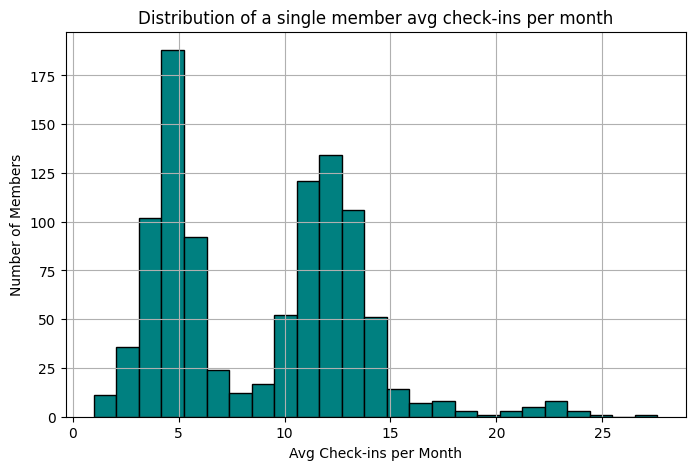

In [26]:
plt.figure(figsize=(8,5))
member_checkin_features['avg_checkins_per_month'].hist(bins=25, edgecolor='black', color='teal')
plt.title("Distribution of a single member avg check-ins per month")
plt.xlabel("Avg Check-ins per Month")
plt.ylabel("Number of Members")
plt.show()

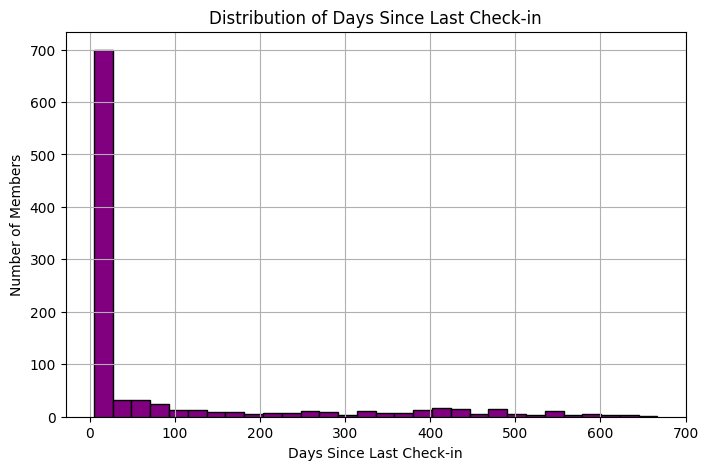

In [27]:
plt.figure(figsize=(8,5))
member_checkin_features['days_since_last_checkin'].hist(bins=30, edgecolor='black', color='purple')
plt.title("Distribution of Days Since Last Check-in")
plt.xlabel("Days Since Last Check-in")
plt.ylabel("Number of Members")
plt.show()

In [28]:
# Ordered days
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dow_dtype = pd.CategoricalDtype(days_order, ordered=True)
member_checkin_features['most_frequent_day'] = member_checkin_features['most_frequent_day'].astype(dow_dtype)

# Pivot: include ALL hours 0..23
heatmap_pivot = (
    member_checkin_features
      .groupby(['most_frequent_day','most_common_hour'], observed=True)
      .size()
      .unstack(fill_value=0)
      .reindex(index=days_order)                      # rows: weekday order
)

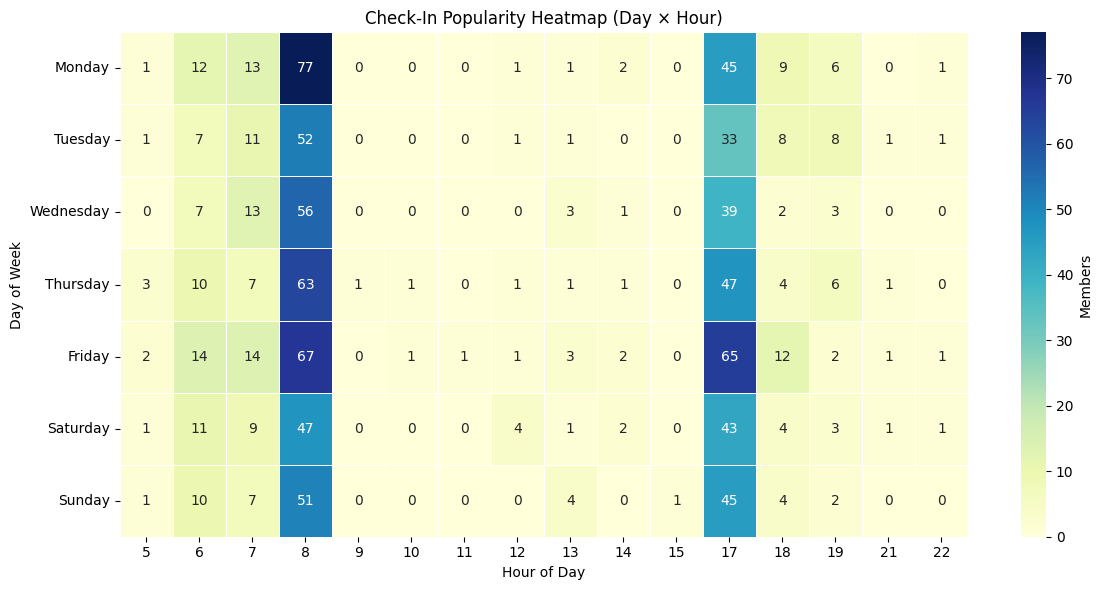

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(
    heatmap_pivot,
    annot=True, fmt=".0f",
    cmap="YlGnBu",
    linewidths=.5, linecolor="white",
    cbar_kws={"label": "Members"}  # it's member counts, not "Attendance"
)
plt.title("Check-In Popularity Heatmap (Day × Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.xticks(rotation=0); plt.yticks(rotation=0)
plt.tight_layout(); plt.show()